In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (c:\Users\yis82\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\metaestimators.py)

In [ ]:
origin = pd.read_excel("https://data.hossam.kr/G02/smoker_status.xlsx")

| 필드명 | 설명  |
|---|---|
| id | 고유 식별 번호 |
| age | 나이 |
| height(cm) | 키 |
| weight(kg) | 몸무게 |
| waist(cm) | 허리둘레 |
| eyesight(left) | 시력(왼쪽) |
| eyesight(right) | 시력(오른쪽) |
| hearing(left) | 청력(왼쪽) |
| hearing(right) | 청력(오른쪽) |
| systolic | 수축기 혈압(mmHg 단위) |
| relaxation | 휴식 혈압(mmHg 단위) |
| fasting blood sugar | 공복 혈당 수치(mg/dL 단위) |
| Cholesterol | 콜레스테롤 수치(mg/dL 단위) |
| triglyceride | 중성지방 수치(mg/dL 단위) |
| HDL | 고밀도 지단백 수치 (mg/dL) |
| LDL | 저밀도 지단백 수치 (mg/dL) |
| hemoglobin | 헤모글로빈 수치(g/dL) |
| Urine protein | 소변내 단백질 수준 |
| serum creatinine | 혈청 크레아티닌 수치(mg/dL) |
| AST | 아스파르트 아미노전이효소(AST) 수준 |
| ALT | 알라닌아미노 전이효소 수준 |
| Gtp | 감마-글루타밀 전이효소 수준 |
| dental caries | 1인당 치아우식증 유무를 나타내는 값(0: 없음, 1: 있음) |
| smoking | 흡연상태(0: 비흡연자, 1: 흡연자) |

## 03. 데이터 전처리
### 데이터 전처리

In [ ]:
print(origin.shape)
print(origin.isnull().any())

(159256, 23)
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
dental caries          False
smoking                False
dtype: bool


In [ ]:
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  159256 non-null  int64  
 1   height(cm)           159256 non-null  int64  
 2   weight(kg)           159256 non-null  int64  
 3   waist(cm)            159256 non-null  float64
 4   eyesight(left)       159256 non-null  float64
 5   eyesight(right)      159256 non-null  float64
 6   hearing(left)        159256 non-null  int64  
 7   hearing(right)       159256 non-null  int64  
 8   systolic             159256 non-null  int64  
 9   relaxation           159256 non-null  int64  
 10  fasting blood sugar  159256 non-null  int64  
 11  Cholesterol          159256 non-null  int64  
 12  triglyceride         159256 non-null  int64  
 13  HDL                  159256 non-null  int64  
 14  LDL                  159256 non-null  int64  
 15  hemoglobin       

### 목적변수 비율 확인

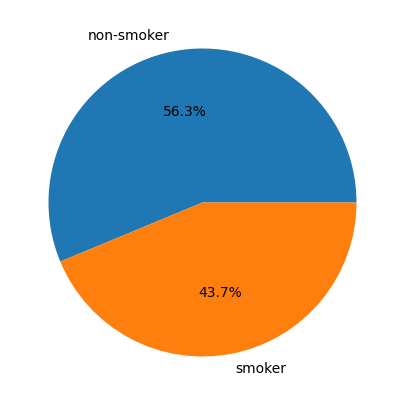

In [ ]:
plt.figure(figsize=(5,5))
    plt.pie(origin['smoking'].value_counts(), labels=['non-smoker', 'smoker'], autopct = "%1.1f%%")
plt.show()
plt.close()

In [ ]:
x = origin.drop(['smoking'], axis = 1)
y = origin['smoking']
x.shape, y.shape

((159256, 22), (159256,))

### 훈련, 검증 데이터 분할

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,random_state= 111)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((119442, 22), (39814, 22), (119442,), (39814,))

### 데이터 불균형 해소

In [ ]:
smote_sampler = SMOTE(sampling_strategy='minority', random_state=111)
x_sm, y_sm = smote_sampler.fit_resample(x_train, y_train)


In [ ]:
rfc = RandomForestClassifier(random_state=111)

params = {
        "n_estimators" : [20, 50, 100],
        'max_depth' : [5, 30, 100]
}

grid = GridSearchCV(rfc, param_grid=params, cv=5, n_jobs = -1)
grid.fit(x_sm,y_sm)

print("최적의 하이퍼 파라미터:", grid.best_params_)
print("최적의 모델 평균 성능(훈련데이터): ", grid.best_score_)

best_model = grid.best_estimator_
y_pred = best_model.predict(x_test)
print('최종 모델의 성능(테스트 데이터): ', accuracy_score(y_test,y_pred))

최적의 하이퍼 파라미터: {'max_depth': 100, 'n_estimators': 100}
최적의 모델 평균 성능(훈련데이터):  0.7981579071051248
최종 모델의 성능(테스트 데이터):  0.7733711759682523


## 04. 훈련모델 적합

### RandomForestClassifier 하이퍼파라미터

| 파라미터 | 설명 |
| -- | --- |
| n_estimators | 결정트리의 갯수를 지정 (기본값 = 10) 성능에 비례, 속도에 반비례 |
| min_samples_split | 노드를 분할하기 위한 최소한의 샘플 데이터 수 과적합을 제어하는데 사용(기본값 = 2), 값이 작을수록 분할 노드가 증가하여 과적합 가능성이 높아짐|
| min_samples_leaf| 리프노드가 되기 위한 최소한의 샘플 데이터 수, 과적합을 제어하는데 사용|
| max_features | 최적의 분할을 이해 고려할 최대 feature 개수(기본값=auto), int형일 경우 갯수, float형일 경우 비율, auto일 경우 전체 feature 만큼 선정|
| max_depth | 트리의 최대 깊이 (기본값=None) |
| max_leaf_nodes | 리프 노드의 최대 개수 |

`max_depth` 가 